In [12]:
from get_data import get_labelled_frame
from utils import display_polars
import polars as pl

import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans


## Importing data with labels and embeddings

In [38]:
frame = get_labelled_frame(t = 'All')

In [39]:
frame.collect().glimpse()

Rows: 2212
Columns: 3
$ sentences        <str> 'Danske Bank A-S DANSKE DC jumped 3.7 percent to 133.4 kroner , rebounding from yesterday s 3.5 percent slide .', 'The studies are expected to start in 2008 .', "The company distributes Hiab 's products as well as other products .", 'The deal is subject to approval by the Norwegian competition authorities .', 'Two other sites will be included later on .', 'Exports grew 16.5 percent to 19.1 million liters .', 'Cargo traffic fell 1 % year-on-year to 8,561 tonnes in September 2009 .', 'Ethanol would be made from barley , and production could start in 2008 .', 'Odell has not contacted the State of Finland in this issue .', 'The exercise originated in Finland in the early 1930s as a training method for cross-country skiers .'
$ label            <str> 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative', 'neutral', 'neutral', 'neutral'
$ embeddings <list[f64]> [-0.007083892822265625, 0.042724609375, 0.034027099609375, 0

## Adding K-Means clustering

In [40]:
kmeans = KMeans(n_clusters=3)
frame = frame.with_columns(
    pl.Series(
        name= 'clusters',
        values= kmeans.fit_predict(frame.select('embeddings').collect().to_series().to_list())
    )
)

In [41]:
frame.collect().glimpse()

Rows: 2212
Columns: 4
$ sentences        <str> 'Danske Bank A-S DANSKE DC jumped 3.7 percent to 133.4 kroner , rebounding from yesterday s 3.5 percent slide .', 'The studies are expected to start in 2008 .', "The company distributes Hiab 's products as well as other products .", 'The deal is subject to approval by the Norwegian competition authorities .', 'Two other sites will be included later on .', 'Exports grew 16.5 percent to 19.1 million liters .', 'Cargo traffic fell 1 % year-on-year to 8,561 tonnes in September 2009 .', 'Ethanol would be made from barley , and production could start in 2008 .', 'Odell has not contacted the State of Finland in this issue .', 'The exercise originated in Finland in the early 1930s as a training method for cross-country skiers .'
$ label            <str> 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative', 'neutral', 'neutral', 'neutral'
$ embeddings <list[f64]> [-0.007083892822265625, 0.042724609375, 0.034027099609375, 0

## Dimension reduction

In [42]:
pca = KernelPCA(n_components=3)

frame = frame.with_columns(
    pl.Series(
        name= "x",
        values= pca.fit_transform(frame.select('embeddings').collect().to_series().to_list())[:,0]
    ),
        pl.Series(
        name= "y",
        values= pca.fit_transform(frame.select('embeddings').collect().to_series().to_list())[:,1]
    ),
        pl.Series(
        name= "z",
        values= pca.fit_transform(frame.select('embeddings').collect().to_series().to_list())[:,2]
    ),

)

In [43]:
frame.collect().head()

sentences,label,embeddings,clusters,x,y,z
str,str,list[f64],i32,f64,f64,f64
"""Danske Bank A-…","""positive""","[-0.007084, 0.042725, … 0.034424]",2,0.04425,0.016387,-0.111043
"""The studies ar…","""neutral""","[-0.054871, 0.000926, … 0.014137]",0,-0.130915,-0.154079,0.065395
"""The company di…","""neutral""","[-0.026917, -0.018295, … 0.001132]",0,-0.117969,-0.005088,0.046358
"""The deal is su…","""neutral""","[-0.052917, 0.008698, … 0.024597]",0,-0.062954,-0.094212,0.085837
"""Two other site…","""neutral""","[-0.028992, 0.006378, … 0.005672]",0,-0.154878,-0.139843,0.035425


## Plots

In [44]:
data = frame.collect()

<Axes: xlabel='x', ylabel='y'>

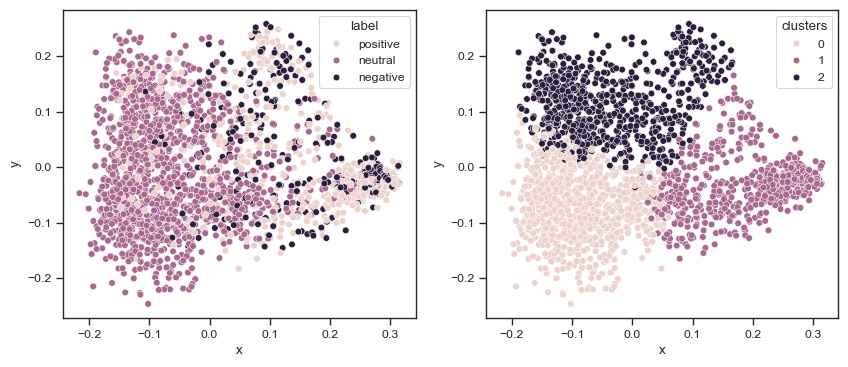

In [45]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10,4)

sns.set_theme(context = 'paper', style='ticks', palette = sns.cubehelix_palette(n_colors=3))
# palette = sns.cubehelix_palette(start=2, n_colors=3)

sns.scatterplot(data=data.to_pandas(), x = data['x'], y = data['y'], hue='label',ax=axes[0])
sns.scatterplot(data=data.to_pandas(), x = data['x'], y = data['y'], hue='clusters',ax=axes[1])

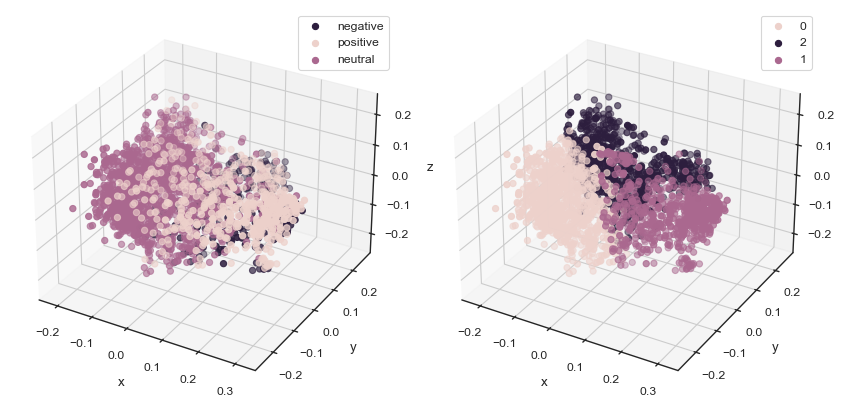

In [46]:
# Create a 3D scatter plot with 3 colors based on the 'category' variable
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121, projection='3d')
colors = {'positive': '#edd1cb', 'neutral': '#aa688f', 'negative': '#2d1e3e'}
for cat in data['label'].unique():
    d = data.filter(pl.col('label').eq(cat))
    ax1.scatter3D(d['x'], d['y'], d['z'], c=colors[cat], label=cat)

# Set the axis labels and legend
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.legend()

ax2 = fig.add_subplot(111, projection='3d')
colors = {'0': '#edd1cb', '1': '#aa688f', '2': '#2d1e3e'}
for cat in data['clusters'].cast(pl.String).unique():
    d = data.filter(pl.col('clusters').cast(pl.String).eq(cat))
    ax2.scatter3D(d['x'], d['y'], d['z'], c=colors[cat], label=cat)

# Set the axis labels and legend
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.legend()

# Show the plot
plt.show()

In [ ]:
df = get_labeled_embedding(['cat', 'cats', 'dog', 'dogs', 'duck', 'ducks'])



tsne = TSNE(n_components=3, random_state=0, perplexity=3).fit_transform(np.array(df['embeddings'].to_list()))
data = tsne
# ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['text'].to_list()))
# sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
# Create a 3D scatter plot with 3 colors based on the 'category' variable
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter3D(tsne[:, 0], tsne[:, 1], tsne[:, 2])

# Set the axis labels and legend
# ax1.set_xlabel('x')
# ax1.set_ylabel('y')
# ax1.set_zlabel('z')
ax1.legend()



# Show the plot
plt.show()